In [147]:
import os 
import pandas as pd
! mkdir -p ~/.kaggle
! mv /path/to/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat '/path/to/kaggle.json': No such file or directory
chmod: cannot access '/home/user/.kaggle/kaggle.json': No such file or directory


In [148]:
accepted_data = pd.read_csv("accepted_2007_to_2018Q4-3.csv")

/tmp/ipykernel_290062/2919088723.py:1: DtypeWarning: Columns (0,19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_data = pd.read_csv("accepted_2007_to_2018Q4-3.csv")


In [149]:
print(accepted_data.head())

         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  75184391        NaN     7400.0       7400.0           7400.0   36 months   
1  75102516        NaN     8000.0       8000.0           8000.0   36 months   
2  75173582        NaN    20000.0      20000.0          20000.0   36 months   
3  75132215        NaN    10075.0      10075.0          10075.0   36 months   
4  75215337        NaN    35000.0      35000.0          35000.0   36 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     16.29       261.23     D        D1  ...                            NaN   
1      8.39       252.14     B        B1  ...                            NaN   
2     13.67       680.36     C        C3  ...                            NaN   
3     15.31       350.79     C        C5  ...                            NaN   
4     16.29      1235.52     D        D1  ...                            NaN   

  hardship_last_payment_amount disbursement_

In [150]:
accepted_data.isnull().sum()

id                            0
member_id                500000
loan_amnt                     6
funded_amnt                   6
funded_amnt_inv               6
                          ...  
settlement_status        492284
settlement_date          492284
settlement_amount        492284
settlement_percentage    492284
settlement_term          492284
Length: 151, dtype: int64

In [151]:
new_dataset = accepted_data.drop(columns=['member_id'])


In [152]:
new_dataset = accepted_data.drop(columns=['policy_code'])

In [153]:

# Calculate the proportion of missing values for each column
missing_proportions = new_dataset.isnull().mean()

# Print the results for each column
for column, missing_proportion in missing_proportions.items():
    print(f"Proportion of missing values in '{column}': {missing_proportion}")

Proportion of missing values in 'id': 0.0
Proportion of missing values in 'member_id': 1.0
Proportion of missing values in 'loan_amnt': 1.2e-05
Proportion of missing values in 'funded_amnt': 1.2e-05
Proportion of missing values in 'funded_amnt_inv': 1.2e-05
Proportion of missing values in 'term': 1.2e-05
Proportion of missing values in 'int_rate': 1.2e-05
Proportion of missing values in 'installment': 1.2e-05
Proportion of missing values in 'grade': 1.2e-05
Proportion of missing values in 'sub_grade': 1.2e-05
Proportion of missing values in 'emp_title': 0.086974
Proportion of missing values in 'emp_length': 0.065934
Proportion of missing values in 'home_ownership': 1.2e-05
Proportion of missing values in 'annual_inc': 1.2e-05
Proportion of missing values in 'verification_status': 1.2e-05
Proportion of missing values in 'issue_d': 1.2e-05
Proportion of missing values in 'loan_status': 1.2e-05
Proportion of missing values in 'pymnt_plan': 1.2e-05
Proportion of missing values in 'url': 1.

In [154]:
# List of columns with more than 50% missing values
columns_to_drop = missing_proportions[missing_proportions > 0.5].index

# Drop columns from DataFrame
new_dataset.drop(columns=columns_to_drop, inplace=True)

# Display the resulting DataFrame
print("DataFrame after dropping columns:")
print(new_dataset)



DataFrame after dropping columns:
               id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0        75184391     7400.0       7400.0           7400.0   36 months   
1        75102516     8000.0       8000.0           8000.0   36 months   
2        75173582    20000.0      20000.0          20000.0   36 months   
3        75132215    10075.0      10075.0          10075.0   36 months   
4        75215337    35000.0      35000.0          35000.0   36 months   
...           ...        ...          ...              ...         ...   
499995  134994717    40000.0      40000.0          40000.0   60 months   
499996  135193188    40000.0      40000.0          40000.0   60 months   
499997  134701744    10000.0      10000.0          10000.0   36 months   
499998  134459101    20000.0      20000.0          20000.0   36 months   
499999  135102522    13000.0      13000.0          13000.0   36 months   

        int_rate  installment grade sub_grade                  emp_title  ...

In [155]:
#Filling missing values with Mode
for column in new_dataset.columns:
    new_dataset[column].fillna(new_dataset[column].mode()[0], inplace=True)

# Display the resulting DataFrame after imputation
print(new_dataset)

/tmp/ipykernel_290062/341000891.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  new_dataset[column].fillna(new_dataset[column].mode()[0], inplace=True)
/tmp/ipykernel_290062/341000891.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_dataset[column].fillna(new_dataset[column].mode()[0], inplace=True)


               id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0        75184391     7400.0       7400.0           7400.0   36 months   
1        75102516     8000.0       8000.0           8000.0   36 months   
2        75173582    20000.0      20000.0          20000.0   36 months   
3        75132215    10075.0      10075.0          10075.0   36 months   
4        75215337    35000.0      35000.0          35000.0   36 months   
...           ...        ...          ...              ...         ...   
499995  134994717    40000.0      40000.0          40000.0   60 months   
499996  135193188    40000.0      40000.0          40000.0   60 months   
499997  134701744    10000.0      10000.0          10000.0   36 months   
499998  134459101    20000.0      20000.0          20000.0   36 months   
499999  135102522    13000.0      13000.0          13000.0   36 months   

        int_rate  installment grade sub_grade                  emp_title  ...  \
0          16.29       261.23 

In [156]:
#Filling missing values with Mode
for column in new_dataset.columns:
    new_dataset[column].fillna(new_dataset[column].mode()[0], inplace=True)

# Display the resulting DataFrame after imputation
print(new_dataset)

/tmp/ipykernel_290062/341000891.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  new_dataset[column].fillna(new_dataset[column].mode()[0], inplace=True)
/tmp/ipykernel_290062/341000891.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_dataset[column].fillna(new_dataset[column].mode()[0], inplace=True)


               id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0        75184391     7400.0       7400.0           7400.0   36 months   
1        75102516     8000.0       8000.0           8000.0   36 months   
2        75173582    20000.0      20000.0          20000.0   36 months   
3        75132215    10075.0      10075.0          10075.0   36 months   
4        75215337    35000.0      35000.0          35000.0   36 months   
...           ...        ...          ...              ...         ...   
499995  134994717    40000.0      40000.0          40000.0   60 months   
499996  135193188    40000.0      40000.0          40000.0   60 months   
499997  134701744    10000.0      10000.0          10000.0   36 months   
499998  134459101    20000.0      20000.0          20000.0   36 months   
499999  135102522    13000.0      13000.0          13000.0   36 months   

        int_rate  installment grade sub_grade                  emp_title  ...  \
0          16.29       261.23 

In [157]:
new_dataset.shape

(500000, 105)

In [158]:
new_dataset['loan_status'].value_counts()

loan_status
Fully Paid            268906
Current               165413
Charged Off            61440
Late (31-120 days)      2397
In Grace Period         1260
Late (16-30 days)        581
Default                    3
Name: count, dtype: int64

In [159]:

# Drop rows where 'Current' appears in the 'loan status' column
new_dataset = new_dataset[new_dataset['loan_status'] != 'Current']

# Display the modified DataFrame
print(new_dataset)

               id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0        75184391     7400.0       7400.0           7400.0   36 months   
1        75102516     8000.0       8000.0           8000.0   36 months   
2        75173582    20000.0      20000.0          20000.0   36 months   
3        75132215    10075.0      10075.0          10075.0   36 months   
6        73640351     3000.0       3000.0           3000.0   36 months   
...           ...        ...          ...              ...         ...   
499934  135211093    10000.0      10000.0          10000.0   36 months   
499939  135099478    13000.0      13000.0          13000.0   60 months   
499973  135021324    40000.0      40000.0          39975.0   36 months   
499979  134952135    19000.0      19000.0          19000.0   60 months   
499992  135101135    35000.0      35000.0          35000.0   36 months   

        int_rate  installment grade sub_grade                 emp_title  ...  \
0          16.29       261.23  

In [160]:
new_dataset['loan_status'].value_counts()

loan_status
Fully Paid            268906
Charged Off            61440
Late (31-120 days)      2397
In Grace Period         1260
Late (16-30 days)        581
Default                    3
Name: count, dtype: int64

In [161]:
new_dataset['loan_status'].replace('Fully Paid', 'Good', inplace=True)

/tmp/ipykernel_290062/740377838.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_dataset['loan_status'].replace('Fully Paid', 'Good', inplace=True)


In [162]:
new_dataset['loan_status'].replace('Charged Off', 'Bad', inplace=True)

/tmp/ipykernel_290062/3895158894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_dataset['loan_status'].replace('Charged Off', 'Bad', inplace=True)


In [163]:
# Categories to be replaced with 'bad'
categories_to_merge = ['Default']

# Replace specified categories with 'bad'
new_dataset['loan_status'] = new_dataset['loan_status'].replace(categories_to_merge, 'Bad')

# Display the modified DataFrame
print(new_dataset)

               id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0        75184391     7400.0       7400.0           7400.0   36 months   
1        75102516     8000.0       8000.0           8000.0   36 months   
2        75173582    20000.0      20000.0          20000.0   36 months   
3        75132215    10075.0      10075.0          10075.0   36 months   
6        73640351     3000.0       3000.0           3000.0   36 months   
...           ...        ...          ...              ...         ...   
499934  135211093    10000.0      10000.0          10000.0   36 months   
499939  135099478    13000.0      13000.0          13000.0   60 months   
499973  135021324    40000.0      40000.0          39975.0   36 months   
499979  134952135    19000.0      19000.0          19000.0   60 months   
499992  135101135    35000.0      35000.0          35000.0   36 months   

        int_rate  installment grade sub_grade                 emp_title  ...  \
0          16.29       261.23  

In [164]:
# Categories to be replaced with 'bad'
categories_to_merge = ['Late (31-120 days)']

# Replace specified categories with 'bad'
new_dataset['loan_status'] = new_dataset['loan_status'].replace(categories_to_merge, 'Bad')

In [165]:
# Categories to be replaced with 'bad'
categories_to_merge = ['Late (16-30 days)']

# Replace specified categories with 'bad'
new_dataset['loan_status'] = new_dataset['loan_status'].replace(categories_to_merge, 'Bad')

In [166]:
# Categories to be replaced with 'bad'
categories_to_merge = ['In Grace Period']

# Replace specified categories with 'bad'
new_dataset['loan_status'] = new_dataset['loan_status'].replace(categories_to_merge, 'Bad')

In [167]:
new_dataset['loan_status'].value_counts()


loan_status
Good    268906
Bad      65681
Name: count, dtype: int64

In [168]:
# separating the data for analysis
GOOD = new_dataset[new_dataset.loan_status == 'Good']
BAD = new_dataset[new_dataset.loan_status == 'Bad']

In [169]:
print(GOOD.shape)
print(BAD.shape)

(268906, 105)
(65681, 105)


In [170]:
legit_sample= GOOD.sample(n=65681)

In [171]:
print(legit_sample.shape)
print(BAD.shape)


(65681, 105)
(65681, 105)


In [172]:
new_dataset = pd.concat([legit_sample, BAD], axis=0)

In [173]:
# Convert all columns to string type (object) if they contain categorical values
new_dataset = new_dataset.apply(lambda x: x.astype(str) if x.dtype == 'object' else x)

# Print the updated DataFrame to verify
print("DataFrame after converting categorical columns to strings:")
print(new_dataset)

DataFrame after converting categorical columns to strings:
               id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
231786   21370081     7200.0       7200.0           7200.0   36 months   
144739   34502729    17875.0      17875.0          17875.0   36 months   
265797   16211490    17775.0      17775.0          17775.0   36 months   
245264   13277332     6000.0       6000.0           6000.0   36 months   
308752   12908510     7000.0       7000.0           7000.0   36 months   
...           ...        ...          ...              ...         ...   
499892  134730577    25000.0      25000.0          25000.0   60 months   
499903  135254448    10000.0      10000.0          10000.0   60 months   
499911  135129945    20000.0      20000.0          20000.0   36 months   
499973  135021324    40000.0      40000.0          39975.0   36 months   
499992  135101135    35000.0      35000.0          35000.0   36 months   

        int_rate  installment grade sub_grade       

In [174]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for col in new_dataset.columns:
    if new_dataset[col].dtype == 'object' and col != 'loan_status':  # Check if the column is categorical and not 'loan_status'
        new_dataset[col + '_encoded'] = label_encoder.fit_transform(new_dataset[col])
        new_dataset.drop(columns=[col], inplace=True)  # Drop the original categorical column after encoding

# Print encoded columns
encoded_columns = [col for col in new_dataset.columns if '_encoded' in col]
print("\nEncoded Columns:")
print(new_dataset[encoded_columns])

# Identify columns that are of type 'object' and exclude 'loan_status'
columns_to_drop = [col for col in new_dataset.select_dtypes(include='object').columns if col != 'loan_status']

# Drop identified columns
new_dataset.drop(columns=columns_to_drop, inplace=True)

# Print the updated DataFrame
print("\nDataFrame after Label Encoding and dropping original categorical columns:")
print(new_dataset)




Encoded Columns:
        id_encoded  term_encoded  grade_encoded  sub_grade_encoded  \
231786       49683             0              1                  9   
144739       81703             0              3                 16   
265797       32884             0              2                 11   
245264       18771             0              0                  2   
308752       15526             0              3                 19   
...            ...           ...            ...                ...   
499892       19804             1              1                  8   
499903       20421             1              3                 15   
499911       20309             0              2                 11   
499973       20137             0              1                  5   
499992       20274             0              0                  4   

        emp_title_encoded  emp_length_encoded  home_ownership_encoded  \
231786              30014                   5                       

In [175]:
# Assuming 'loan_status' is the column you want to print
new_dataset['loan_status'].value_counts()


loan_status
Good    65681
Bad     65681
Name: count, dtype: int64

In [176]:
print(new_dataset)

        loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
231786     7200.0       7200.0           7200.0     12.49       240.84   
144739    17875.0      17875.0          17875.0     15.99       628.35   
265797    17775.0      17775.0          17775.0     13.35       601.92   
245264     6000.0       6000.0           6000.0      7.12       185.60   
308752     7000.0       7000.0           7000.0     19.47       258.26   
...           ...          ...              ...       ...          ...   
499892    25000.0      25000.0          25000.0     11.05       544.19   
499903    10000.0      10000.0          10000.0     17.47       251.06   
499911    20000.0      20000.0          20000.0     14.03       683.85   
499973    40000.0      40000.0          39975.0      9.58      1282.82   
499992    35000.0      35000.0          35000.0      8.08      1098.07   

        annual_inc loan_status    dti  delinq_2yrs  fico_range_low  ...  \
231786    180000.0        Good   5.9

In [177]:
new_dataset.groupby('loan_status').mean()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,zip_code_encoded,addr_state_encoded,earliest_cr_line_encoded,initial_list_status_encoded,last_pymnt_d_encoded,last_credit_pull_d_encoded,application_type_encoded,hardship_flag_encoded,disbursement_method_encoded,debt_settlement_flag_encoded
loan_status,,,,,,,,,,,,,,,,,,,,,
Bad,15865.453480,15865.453480,15858.836269,15.738909,466.091605,71174.108847,20.236204,0.366164,686.356861,690.356892,...,452.632877,22.627259,357.322422,0.628782,31.071528,36.065270,0.012089,0.000624,0.010718,0.117401
Good,14466.535985,14466.535985,14460.925915,12.643286,441.002448,78154.157206,17.917836,0.335729,695.590277,699.590384,...,461.338271,22.587110,355.919627,0.614653,30.840624,34.587719,0.007384,0.000000,0.005618,0.000015


In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [181]:
!pip install pandas numpy seaborn matplotlib



Defaulting to user installation because normal site-packages is not writeable


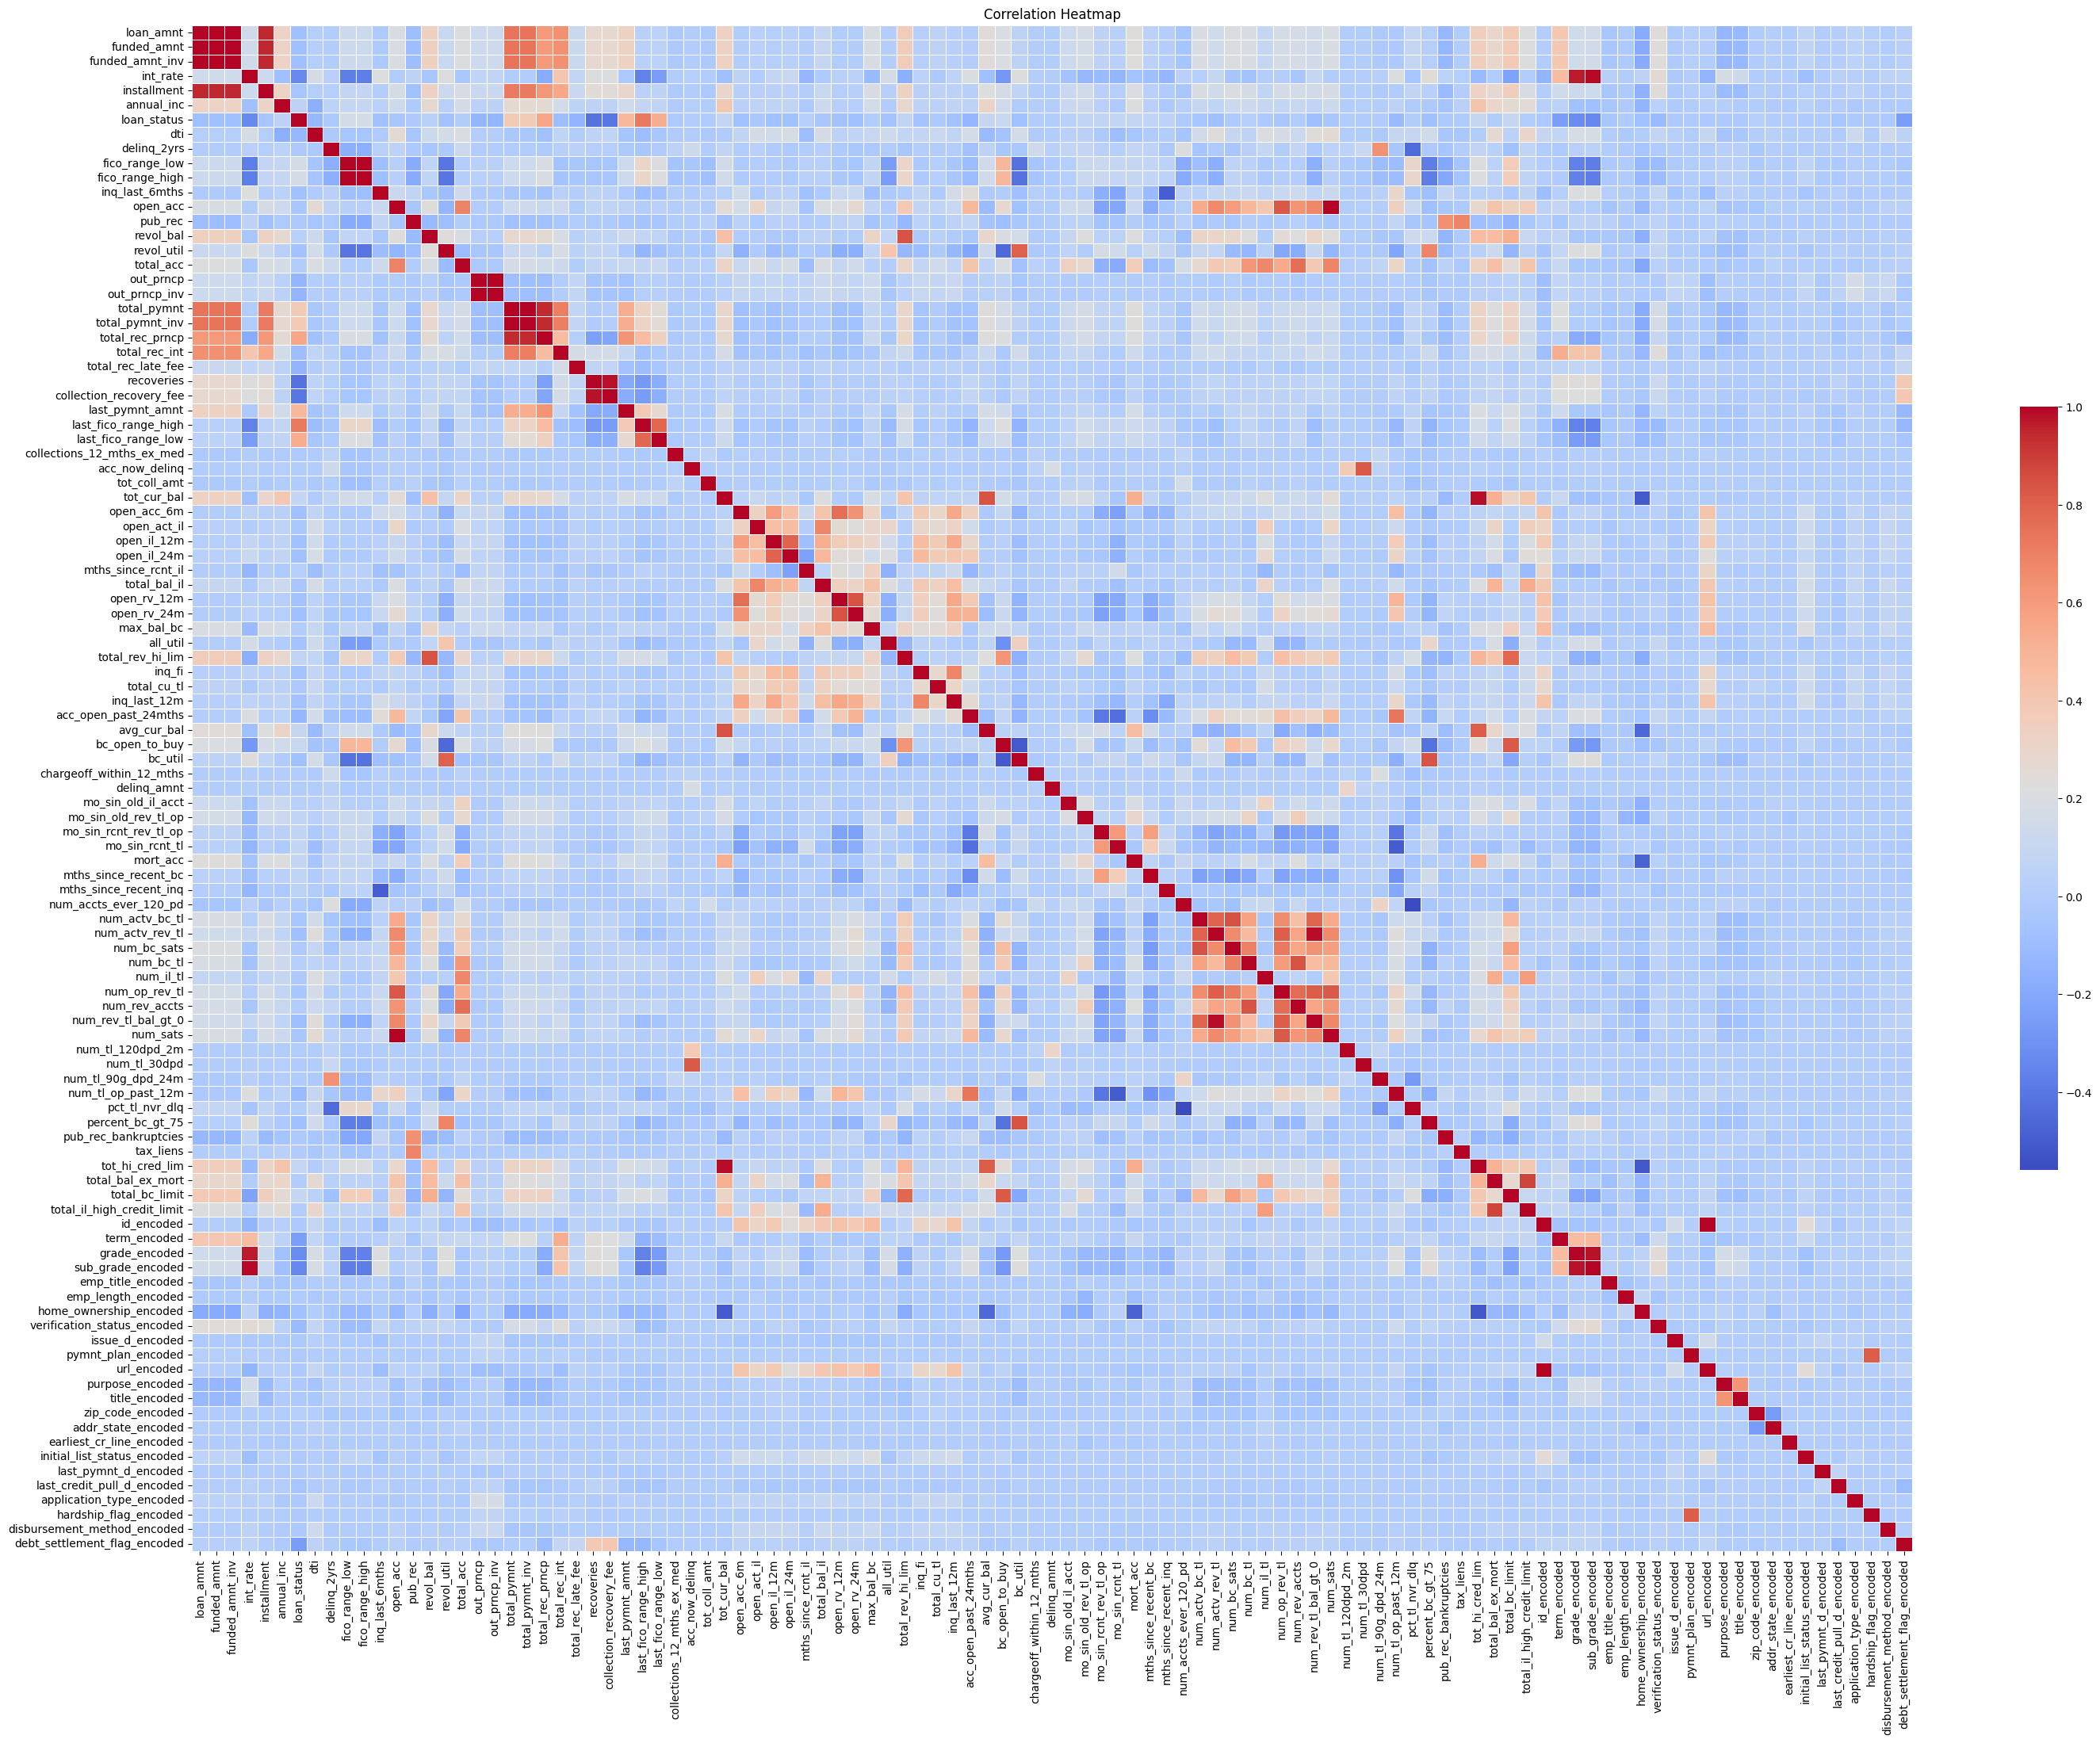

loan_amnt                      -0.081290
funded_amnt                    -0.081290
funded_amnt_inv                -0.081255
int_rate                       -0.328445
installment                    -0.049526
                                  ...   
last_credit_pull_d_encoded     -0.047740
application_type_encoded       -0.023956
hardship_flag_encoded          -0.017670
disbursement_method_encoded    -0.028333
debt_settlement_flag_encoded   -0.249674
Name: loan_status, Length: 104, dtype: float64


In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical using label encoding
label_encoder = LabelEncoder()
new_dataset['loan_status'] = label_encoder.fit_transform(new_dataset['loan_status'])

# Compute the correlation matrix
correlation_matrix = new_dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(35,25))

# Draw the heatmap
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.5})

# Show the plot
plt.title('Correlation Heatmap')
plt.show()




Correlation with the target variable:
 last_fico_range_high       0.721978
total_rec_prncp            0.556000
last_fico_range_low        0.526778
last_pymnt_amnt            0.481182
total_pymnt                0.377119
                             ...   
grade_encoded             -0.325145
int_rate                  -0.328445
sub_grade_encoded         -0.333507
collection_recovery_fee   -0.403344
recoveries                -0.421533
Name: loan_status, Length: 104, dtype: float64


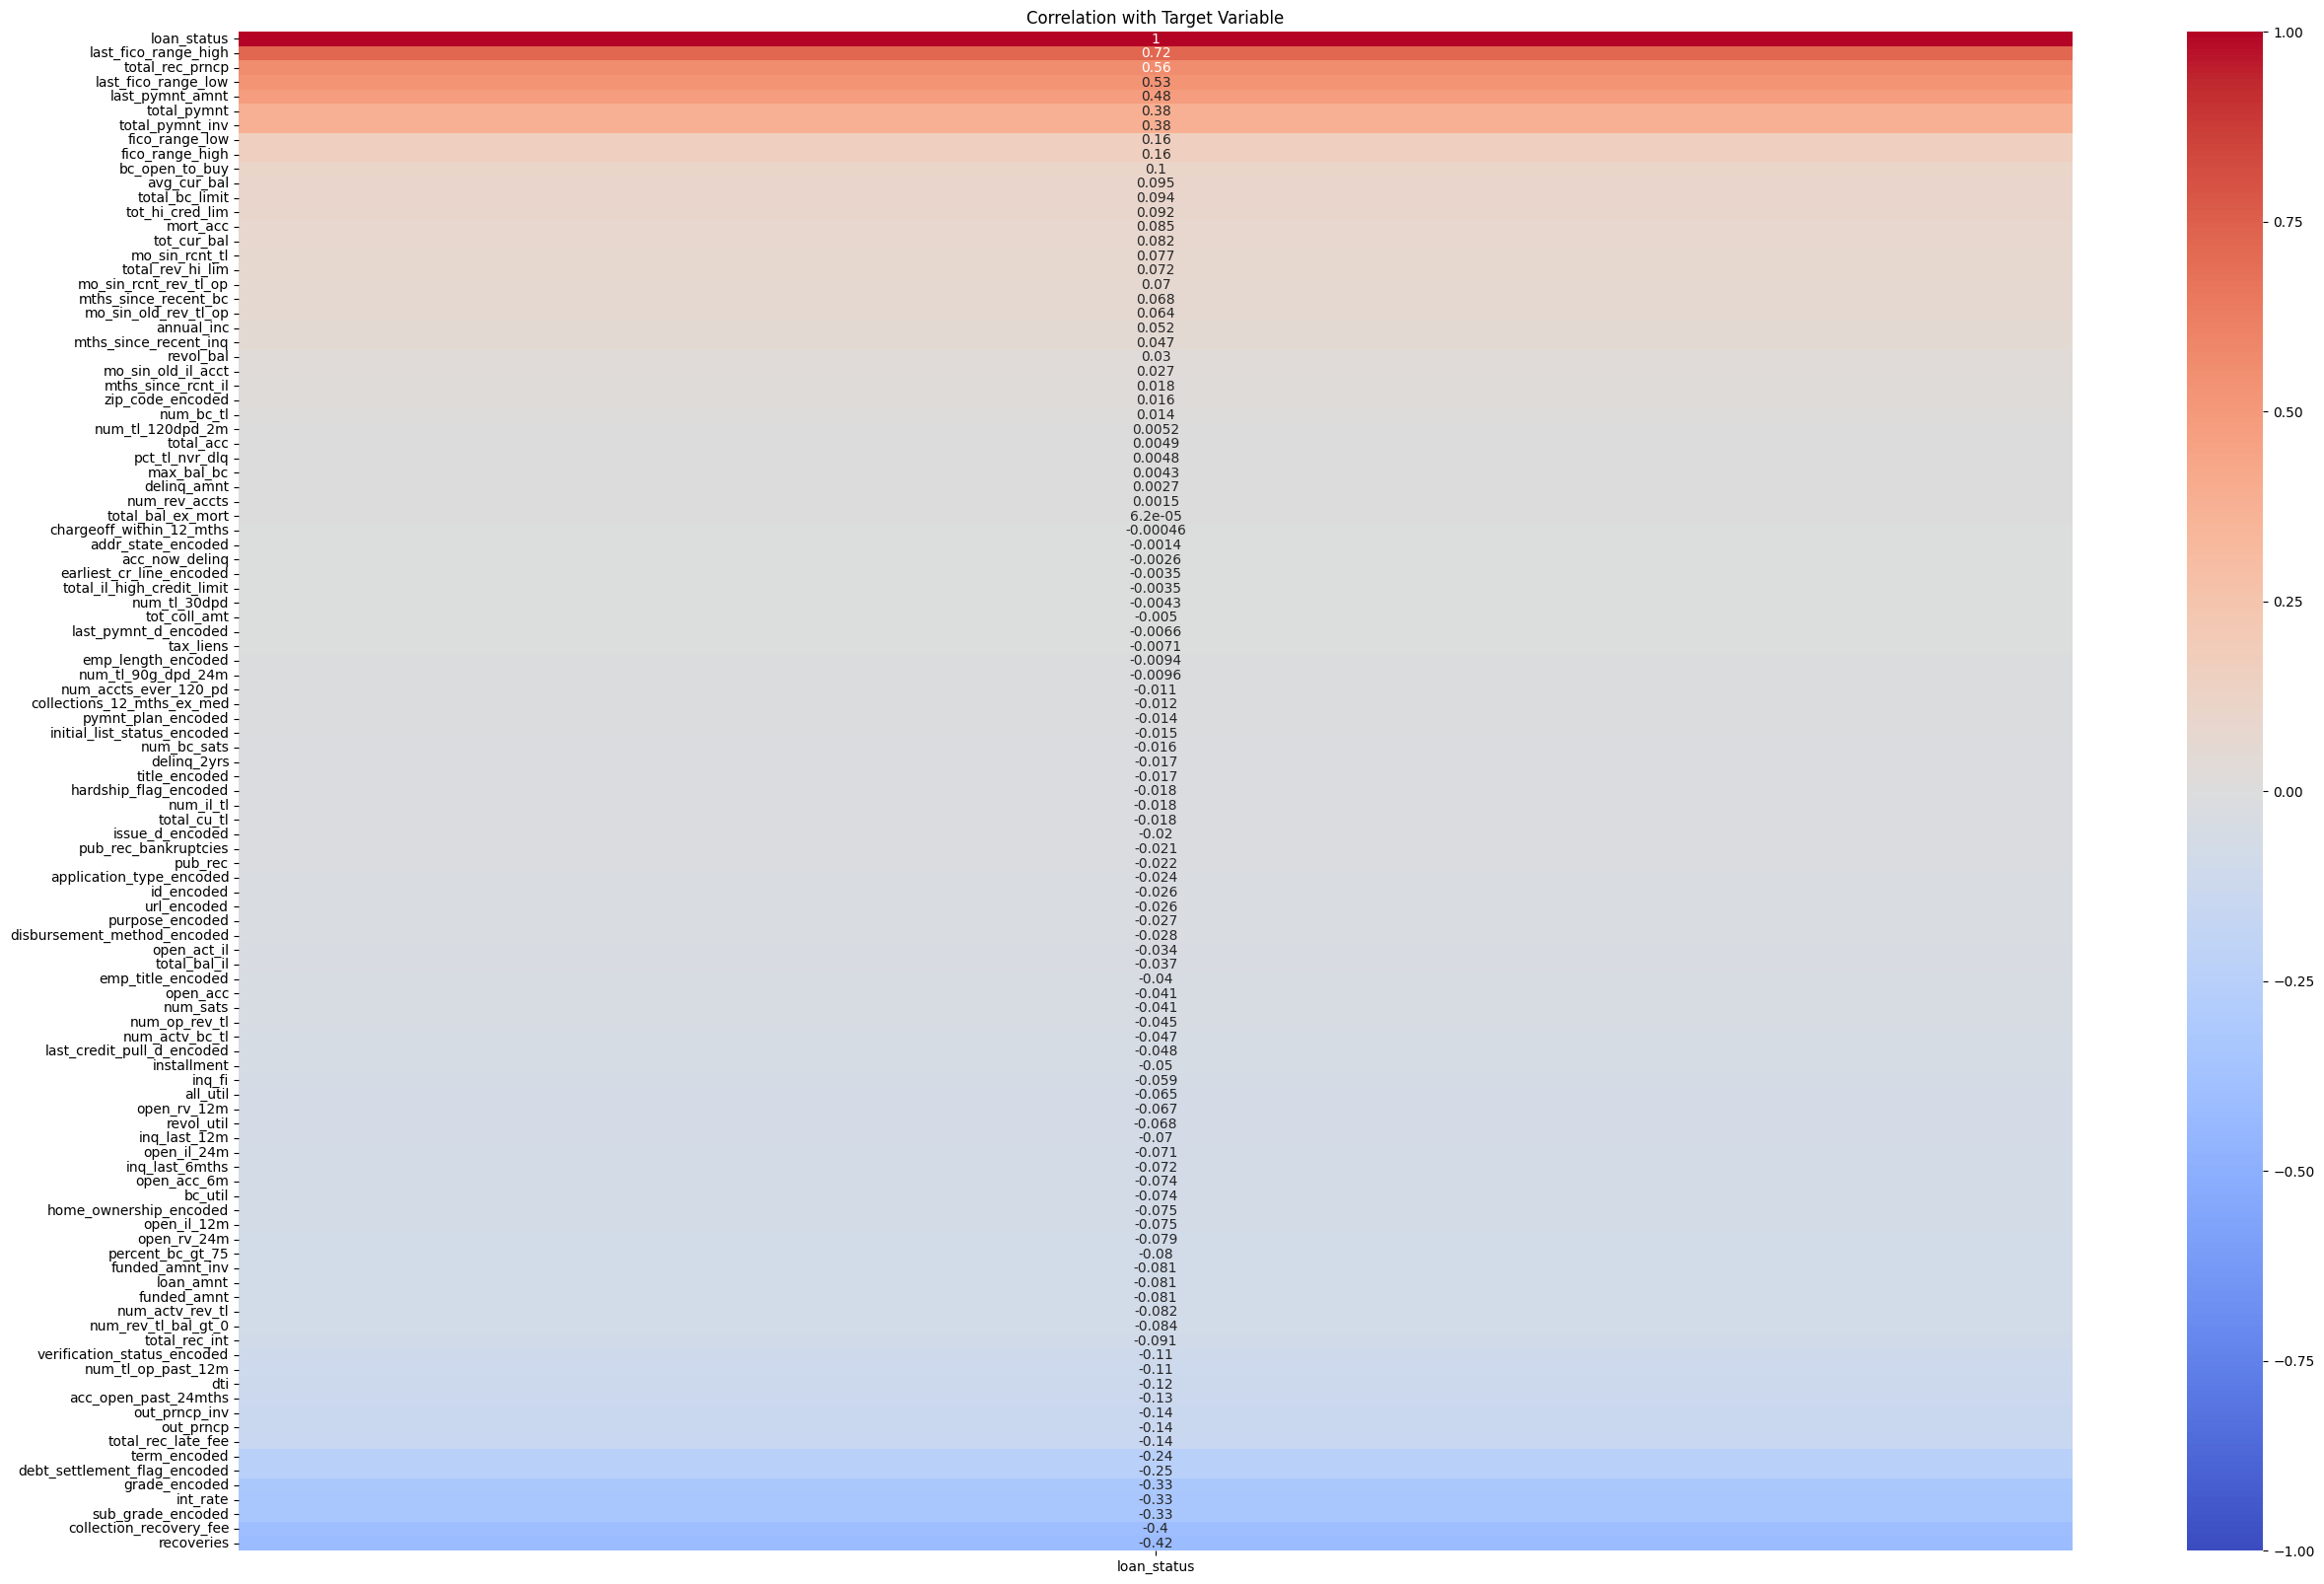

In [197]:


# Specify the target variable
target_variable = 'loan_status'

# Extract correlations with the target variable
target_corr = correlation_matrix[target_variable].drop(target_variable)

# Display the correlations with the target
print("Correlation with the target variable:\n", target_corr.sort_values(ascending=False))

# Plot the correlation heatmap for visualization
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix[[target_variable]].sort_values(by=target_variable, ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target Variable')
plt.show()


Columns retained after dropping low-correlation (less than 0.2 in magnitude) features:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'loan_status', 'dti', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'tot_cur_bal', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_actv_rev_tl', 'num_rev_tl_bal_gt_0', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bc_limit', 'term_encoded', 'grade_encoded', 'sub_grade_encoded', 'home_ownership_encoded',

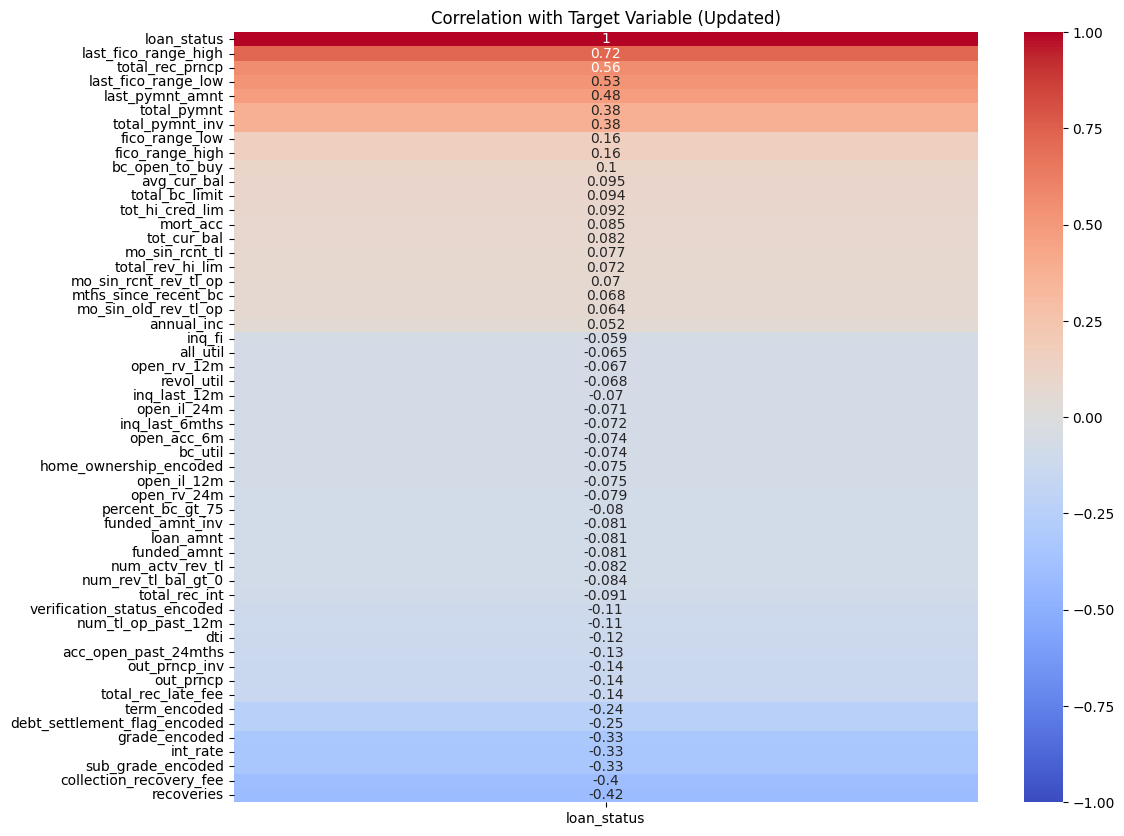

In [200]:
# Filter columns with correlation magnitude less than 0.2
columns_to_drop = target_corr[abs(target_corr) < 0.05].index

# Drop the identified columns
df_dropped = new_dataset.drop(columns=columns_to_drop)

# Display the remaining columns
print(f"Columns retained after dropping low-correlation (less than 0.2 in magnitude) features:\n{df_dropped.columns.tolist()}")

# Plot the correlation heatmap for visualization of the updated DataFrame
updated_correlation_matrix = df_dropped.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(updated_correlation_matrix[[target_variable]].sort_values(by=target_variable, ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target Variable (Updated)')
plt.show()

In [213]:
X = df_dropped .drop(columns='loan_status', axis=1)
Y = new_dataset['loan_status']

In [214]:
print(X)

        loan_amnt  funded_amnt  funded_amnt_inv  int_rate  annual_inc    dti  \
231786     7200.0       7200.0           7200.0     12.49    180000.0   5.93   
144739    17875.0      17875.0          17875.0     15.99     35900.0  23.37   
265797    17775.0      17775.0          17775.0     13.35     70000.0  32.44   
245264     6000.0       6000.0           6000.0      7.12     32000.0   7.24   
308752     7000.0       7000.0           7000.0     19.47    112000.0  14.37   
...           ...          ...              ...       ...         ...    ...   
499892    25000.0      25000.0          25000.0     11.05    116000.0  18.95   
499903    10000.0      10000.0          10000.0     17.47     80000.0  22.53   
499911    20000.0      20000.0          20000.0     14.03     70000.0  20.44   
499973    40000.0      40000.0          39975.0      9.58    285000.0  13.40   
499992    35000.0      35000.0          35000.0      8.08     45000.0  18.56   

        fico_range_low  fico_range_high

In [215]:
print(Y)

231786    1
144739    1
265797    1
245264    1
308752    1
         ..
499892    0
499903    0
499911    0
499973    0
499992    0
Name: loan_status, Length: 131362, dtype: int64


In [216]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [217]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [218]:
print(X.shape, X_train.shape, X_test.shape)

(131362, 53) (105089, 53) (26273, 53)


In [219]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [220]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 

In [221]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 

In [222]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9950137502497882


In [223]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 


In [224]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.9953564495870285
